# Building a Custon Neural Network Using the Keras Functional API
By Adam Lang
Date: February 16, 2024
* Same prediction problem as previous 2 notebooks.
* I will again use Keras and Tensorflow.
* This time however, I will build a custom model using the Keras functional API.

Problem Statement
* Binary Classification.
* Prediction whether a customer should be approved for a loan or not.
* Target dependent variable: 'Loan_Status'

In [2]:
# import required libraries
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# load data pre-processed from previous notebook
data = pd.read_csv('/content/drive/MyDrive/Analytics_Vidhya_LLM_GenAI/loan_prediction_pre-processed.csv')

In [4]:
# view first few rows
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0.000000,1.0,0.0,0.070489,0.000000,0.198860,0.74359,1.0,1.0,1.0
1,LP001003,0.0,1.0,0.333333,1.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0.0
2,LP001005,0.0,1.0,0.000000,1.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1.0
3,LP001006,0.0,1.0,0.000000,0.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0
4,LP001008,0.0,0.0,0.000000,1.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0,1.0


In [5]:
# data types again
data.dtypes

Loan_ID               object
Gender               float64
Married              float64
Dependents           float64
Education            float64
Self_Employed        float64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area        float64
Loan_Status          float64
dtype: object

In [6]:
# remove loan_ID column => unique for each row
data = data.drop('Loan_ID', axis=1)

In [7]:
# check shape
data.shape

(614, 12)

In [8]:
# separate independent and dependent variables

# store all independent variables as X
X = data.drop('Loan_Status', axis=1)

# storing dependent variable as y
y = data['Loan_Status']

In [9]:
# shape of ind and dep vars
X.shape, y.shape

((614, 11), (614,))

# 2. Create training and validation set

In [10]:
# Creating training and validation set

# stratify makes sure distribution of classes in train and validation set are similar
# random state regenerates same train and validation set
# test size 0.2 keeps 20% of data in validation and remaining 80% in train set

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=data['Loan_Status'],
                                                    random_state=10, test_size=0.2)

In [11]:
# shape of training and validation set
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((491, 11), (491,)), ((123, 11), (123,)))

# 3. Defining architecture of model

In [12]:
# import libraries
import keras
from keras import Input, Model
from keras.models import Sequential
from keras.layers import InputLayer, Dense, concatenate

In [13]:
# number of input neurons
X_train.shape

(491, 11)

In [14]:
# number of features in the data
X_train.shape[1]

11

In [15]:
# define input neurons
input_neurons = X_train.shape[1]

# define number of output neurons
output_neurons = 1

In [16]:
# define hidden layers and neuron in each layer
number_of_hidden_layers = 2
neuron_hidden_layer_1_1 = 10 #two hidden layers in parallel
neuron_hidden_layer_1_2 = 20 #two hidden layers in parallel
neuron_hidden_layer_2 = 5

In [17]:
# defining architecture of model using Functional API
x = Input(shape = (input_neurons,))
hidden1_1 = Dense(units=neuron_hidden_layer_1_1, activation = 'relu')(x) #input via input layer
hidden1_2 = Dense(units=neuron_hidden_layer_1_2, activation = 'relu')(x) #input via input layer

# concatenate output of both hidden layers
combined = concatenate([hidden1_1, hidden1_2])

# next single hidden layer - output is combined output of previous hidden layers
hidden2 = Dense(units=neuron_hidden_layer_2, activation='relu')(combined)
output = Dense(units=output_neurons, activation='sigmoid')(hidden2)

model_functional = Model(x, output)

In [20]:
# summary of model
model_functional.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 11)]                 0         []                            
                                                                                                  
 dense (Dense)               (None, 10)                   120       ['input_1[0][0]']             
                                                                                                  
 dense_1 (Dense)             (None, 20)                   240       ['input_1[0][0]']             
                                                                                                  
 concatenate (Concatenate)   (None, 30)                   0         ['dense[0][0]',               
                                                                     'dense_1[0][0]']         

summary:
* concatenate layer is sum of dense + dense_1 hidden layers
* notice the architectures input and output of each layer

# 4. Compiling the model (define loss function, optimizer)

In [24]:
# compiling the model

# loss as binary_crossentropy, since we have binary classification problem
# defining the optimizer as adam
# evaluation metric as accuracy

model_functional.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

# 5. Training model

In [25]:
# training model

# passing independent and dependent features for training set to train model

# validation data will be evaluated at end of each epoch

# setting epochs at 50

# storing trained model in model_history variable which will be used to visualize training process

model_history = model_functional.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Epoch 1/50
16/16 [==============================] - 3s 47ms/step - loss: 0.6295 - accuracy: 0.6864 - val_loss: 0.6144 - val_accuracy: 0.6911
Epoch 2/50
16/16 [==============================] - 0s 9ms/step - loss: 0.6027 - accuracy: 0.6884 - val_loss: 0.5975 - val_accuracy: 0.6911
Epoch 3/50
16/16 [==============================] - 0s 10ms/step - loss: 0.5901 - accuracy: 0.6864 - val_loss: 0.5895 - val_accuracy: 0.6911
Epoch 4/50
16/16 [==============================] - 0s 11ms/step - loss: 0.5828 - accuracy: 0.6864 - val_loss: 0.5837 - val_accuracy: 0.6911
Epoch 5/50
16/16 [==============================] - 0s 12ms/step - loss: 0.5777 - accuracy: 0.6904 - val_loss: 0.5778 - val_accuracy: 0.6911
Epoch 6/50
16/16 [==============================] - 0s 12ms/step - loss: 0.5720 - accuracy: 0.6904 - val_loss: 0.5725 - val_accuracy: 0.6911
Epoch 7/50
16/16 [==============================] - 0s 10ms/step - loss: 0.5669 - accuracy: 0.6904 - val_loss: 0.5669 - val_accuracy: 0.6911
Epoch 8/50
16/

# 6. Evaluating model performance on validation set

In [26]:
# getting predictions for validation set
prediction = model_functional.predict(X_test)

4/4 [==============================] - 0s 7ms/step


In [27]:
prediction = prediction.reshape(123,)

# converting probabilities to classes
prediction_int = prediction >= 0.5
prediction_int = prediction_int.astype(np.int64)

In [28]:
# calculating accuracy on validation set
accuracy_score(y_test, prediction_int)

0.8130081300813008

summary: accuracy is 81.3%

# Visualizing the model performance

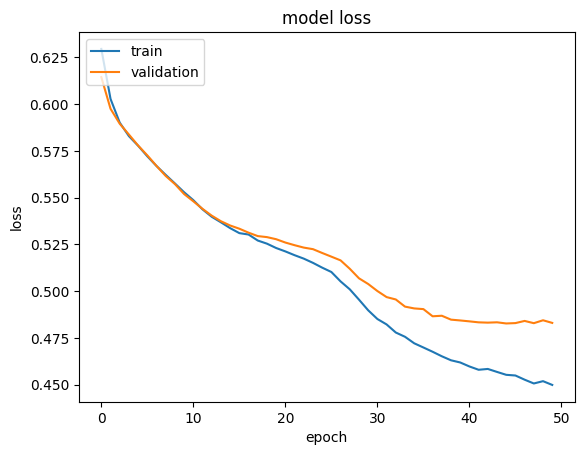

In [29]:
# summarize history for model loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

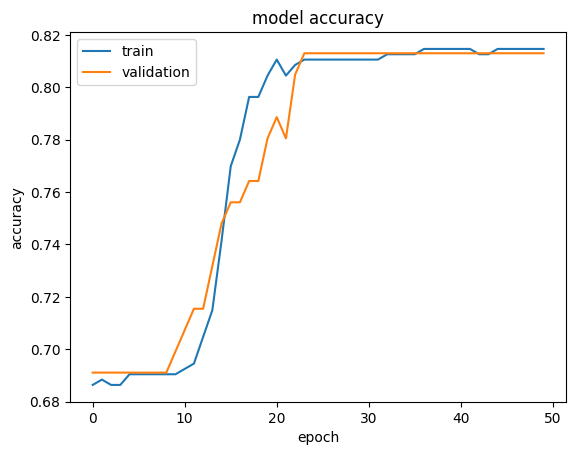

In [30]:
# summarize and plot history for accuracy of model
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

summary: Accuracy stabilizes around epoch 15